#### Clasificador Naive Bayes

Ahora suponga que desea calcular la probabilidad de jugar futbol cuando el clima está nublado y la temperatura es templada.

Caracteristicas (entradas del modelo): clima, temperatura
Variable objetivo (clase): jugar (0: No, 1:Si)

#### Importar librerias

In [8]:
# Libreria para calculos matematicos
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Libreria para los gráficos
import matplotlib.pyplot as plt

# Libreria para el preprocesamiento de los datos
from sklearn import preprocessing
# Libreria para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para separar los datos
from sklearn.model_selection import train_test_split
# Libreria para el Accuracy
from sklearn.metrics import accuracy_score

#### Cargar los datos

In [9]:
# Leer el archivo plano y cargarlo en un dataframe
data = pd.read_csv("./data/exercise1.csv", sep=";")

data

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,luvioso,frio,no
5,lluvioso,frio,no
6,nublado,frio,si
7,soleado,templado,no
8,soleado,frio,si
9,lluvioso,templado,si


#### Pre-procesamiento

In [10]:
# Convertir los valores de tipo cadena a tipo discreto (0, 1, 2)
le = preprocessing.LabelEncoder()

# Se adiciona una columna al dataframe con los valores discretos de Clima
data['clima2'] = le.fit_transform(data['clima'])

# Se adiciona una columna al dataframe con los valores discretos de Temperatura
data['temperatura2'] = le.fit_transform(data['temperatura'])

# Se adiciona una columna al dataframe con los valores discretos de Jugar
data['jugar2'] = le.fit_transform(data['jugar'])

data

,clima,temperatura,jugar,clima2,temperatura2,jugar2
0,soleado,caliente,no,3,0,0
1,soleado,caliente,si,3,0,1
2,nublado,caliente,si,2,0,1
3,lluvioso,templado,si,0,2,1
4,luvioso,frio,no,1,1,0
5,lluvioso,frio,no,0,1,0
6,nublado,frio,si,2,1,1
7,soleado,templado,no,3,2,0
8,soleado,frio,si,3,1,1
9,lluvioso,templado,si,0,2,1


#### Observo las estadisticas de los datos

In [11]:
# Solo valores discretos
data.describe()

,clima2,temperatura2,jugar2
count,14.000000,14.000000,14.000000
mean,1.714286,1.142857,0.642857
std,1.266647,0.864438,0.497245
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000
50%,2.000000,1.000000,1.000000
75%,3.000000,2.000000,1.000000
max,3.000000,2.000000,1.000000


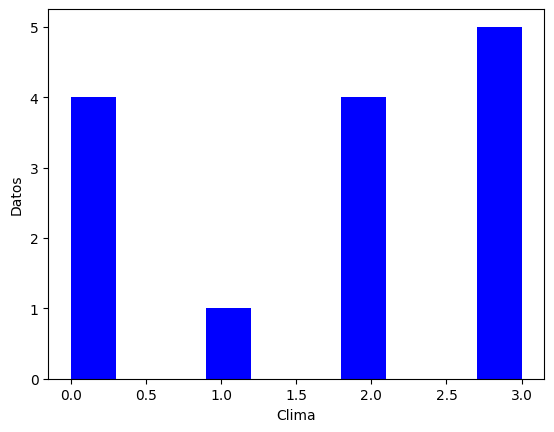

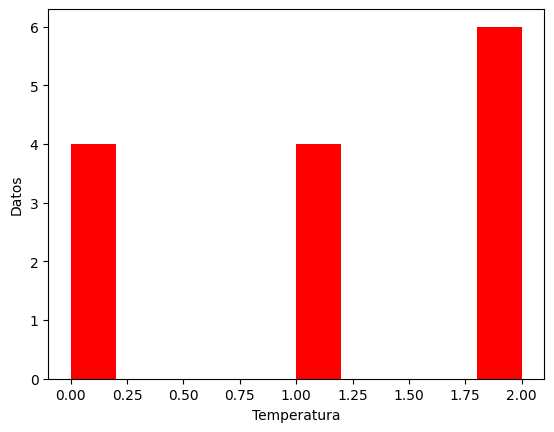

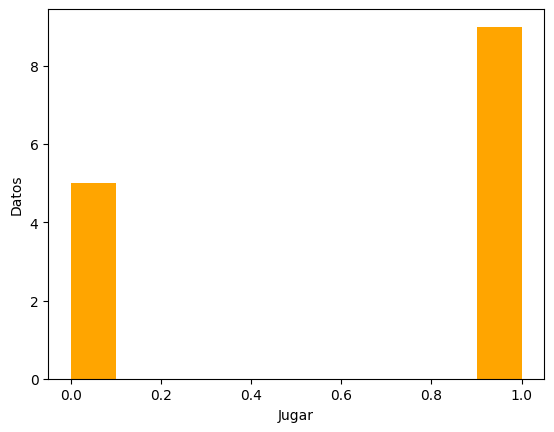

In [12]:
# Histograma para ver la distribución de los datos en un espacio Clima
plt.hist(data['clima2'], color = "blue")
plt.xlabel("Clima")
plt.ylabel("Datos")
plt.show()

# Temperatura
plt.hist(data['temperatura2'], color = "red")
plt.xlabel("Temperatura")
plt.ylabel("Datos")
plt.show()

# Jugar
plt.hist(data['jugar2'], color = "orange")
plt.xlabel("Jugar")
plt.ylabel("Datos")
plt.show()

#### Creamos el modelo de predicción Naive Bayes

In [13]:
# Definir las características
features = ['clima2','temperatura2']
x = data[features].values

# Definir la variable objetivo o clase
y = data['jugar2']

# Se crea el modelo
nb = GaussianNB()

# Se entrena el modelo
nb.fit(x, y)

# Se genera una predicción (nublado = 1, templado = 2)
prediction = nb.predict([[1, 2]])

print("Predicción = ", prediction)

Predicción =  [1]


#### Separación de los datos (70% entrenamiento - 30% pruebas)

In [14]:
# Definir las características
features = ['clima2','temperatura2']
x = data[features].values

# Definir la variable objetivo o clase
y = data['jugar2']

# Separo los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state= 1)



# Se realiza la predicción y se imprime el valor de la métrica (accuracy)

In [15]:
# Se crea el modelo
nb = GaussianNB()

# Se entrena el modelo
nb.fit(x_train, y_train)

# Se genera la predicción
prediction = nb.predict(x_test)

# Se imprime el valor de la métrica Accuracy
print("Accuracy = ", accuracy_score(y_test, prediction))

Accuracy =  0.6
